In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
import os
from PIL import Image
import numpy as np

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        if os.path.isfile(file_path):  # Check if it's a file
            img = Image.open(file_path).convert('RGB')  # Convert to RGB
            if img is not None:
                images.append(img)
    return images

folder_path = '/home/jupyter-varsha.pandanda.22-65fa8/Group Project/pics'  # Replace with your folder path
images_array = load_images_from_folder(folder_path)


In [3]:
images_array_new =images_array * 4
L = "Left"
R = "Right"
answer = [L,R,R,L,L,R,L,R,L,R,R,L,L,L,R,R]
all_answers = answer * 4
len(all_answers)

64

In [4]:
import requests
from bs4 import BeautifulSoup
import json
import time

def send_to_google_form(data_dict, form_url):
    ''' Helper function to upload information to a corresponding google form 
        You are not expected to follow the code within this function!
    '''
    form_id = form_url[34:90]
    view_form_url = f'https://docs.google.com/forms/d/e/{form_id}/viewform'
    post_form_url = f'https://docs.google.com/forms/d/e/{form_id}/formResponse'

    page = requests.get(view_form_url)
    content = BeautifulSoup(page.content, "html.parser").find('script', type='text/javascript')
    content = content.text[27:-1]
    result = json.loads(content)[1][1]
    form_dict = {}
    
    loaded_all = True
    for item in result:
        if item[1] not in data_dict:
            print(f"Form item {item[1]} not found. Data not uploaded.")
            loaded_all = False
            return False
        form_dict[f'entry.{item[4][0][0]}'] = data_dict[item[1]]
    
    post_result = requests.post(post_form_url, data=form_dict)
    return post_result.ok
  

In [5]:
# copy this code to the top cell of your 
import time
import ipywidgets as widgets
from IPython.display import display, clear_output, HTML
from jupyter_ui_poll import ui_events

event_info = {
    'type': '',
    'description': '',
    'time': -1
}

def wait_for_event(timeout=-1, interval=0.001, max_rate=20, allow_interupt=True):    
    start_wait = time.time()

    # set event info to be empty
    # as this is dict we can change entries
    # directly without using
    # the global keyword
    event_info['type'] = ""
    event_info['description'] = ""
    event_info['time'] = -1

    n_proc = int(max_rate*interval)+1
    
    with ui_events() as ui_poll:
        keep_looping = True
        while keep_looping==True:
            # process UI events
            ui_poll(n_proc)

            # end loop if we have waited more than the timeout period
            if (timeout != -1) and (time.time() > start_wait + timeout):
                keep_looping = False
                
            # end loop if event has occured
            if allow_interupt==True and event_info['description']!="":
                keep_looping = False
                
            # add pause before looping
            # to check events again
            time.sleep(interval)
    
    # return event description after wait ends
    # will be set to empty string '' if no event occured
    return event_info

# this function lets buttons 
# register events when clicked
def register_event(btn):
    # display button description in output area
    event_info['type'] = "click"
    event_info['description'] = btn.description
    event_info['time'] = time.time()
    return
    

In [20]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import time
from IPython.display import display, clear_output

# Function to show the images one by one with specified display time and response time
def show_images(image_files, display_time=0.75, response_time=3):
    
    responses = []
    
    data_consent_info = """DATA CONSENT INFORMATION:

    Please read:

    we wish to record your response data

    to an anonymised public data repository.

    Your data will be used for educational teaching purposes

    practising data analysis and visualisation.

    Please type yes in the box below if you consent to the upload."""

    print(data_consent_info)
    result = input("> ")
    if result == "yes":

        print("Thanks for your participation.")

        print("Please contact philip.lewis@ucl.ac.uk")

        print("If you have any questions or concerns")

        print("regarding the stored results.")

    else:

        raise(Exception("User did not consent to continue test."))

    
    print("""

    Enter your anonymised ID

    To generate an anonymous 4-letter unique user identifier please enter:

    - two letters based on the initials (first and last name) of a childhood friend

    - two letters based on the initials (first and last name) of a favourite actor 

    Example: if your friend is named David Johnson and favourite actor is Morgan Freeman

    then your unique identifer would be DJMF

    """)
    user_id = input("> ")

    print("User entered id:", user_id)
   
    print(f"Welcome to the Approximate Number System (ANS) test {user_id}.\n This test evaluates your non-verbal numerical estimation skills.\n The ANS is a portion of your congition that is active throughout your life. \n During this test, you will be shown 64 images, \n with blue dots on the left and yellow dots on the right. \n Each image has a different number of dots on both sides. \n Your task is to simply guess which side has more dots, by clicking the Left or Right button\n At the end, your score will be calculated.") 
    time.sleep(3)
    clear_output(wait=True)
    
    print("Ready? Let's begin")
    time.sleep(3)
    clear_output(wait=True)
    
    for i in range(64):
        img = images_array_new[i]
        display(img)
        time.sleep(display_time)
        clear_output(wait=True)

        btn1 = widgets.Button(description="Left")
        btn2 = widgets.Button(description="Right")
            
        # we need to set up each button
        # to call the register_event
        # function when clicked
        btn1.on_click(register_event) 
        btn2.on_click(register_event) 
           
        myhtml1 = HTML("<h1>Which side has more dots</h1>")
        display(myhtml1)
        myhtml2 = HTML("<h2>You have 3 seconds to answer</h2>")
        display(myhtml2)
        
        panel = widgets.HBox([btn1, btn2])
        display(panel)
        
        result = wait_for_event(timeout=3)
        clear_output()
        
        if result['description']!="":
            responses.append(result['description'])
        else:
            responses.append("User did not click in time")
        clear_output(wait=True)

    form_url = "https://docs.google.com/forms/d/e/1FAIpQLSfpWUE9GWZ1I22dOzkwdQqt9P9xJM2YwQgHOT3I7hqyoqnU3A/viewform?usp=sf_link"
    send_to_google_form(calculate_score(user_id, all_answers, responses), form_url)
    return 


In [21]:
def calculate_score(user_id, all_answers, responses):
    right = 0
    wrong = 0
    unanswered = 0
    score = []
    for i in range(64):
        if(all_answers[i] == responses[i]):
            right += 1
        elif  (responses[i] == "User did not click in time"):
            unanswered +=1
        else:
            wrong+=1
    score = right-wrong
            
    mydata = {
    'User ID': user_id,
    'Correct': right,
    'Incorrect': wrong,
    'Unanswered': unanswered,
    'Score': score
}
    return mydata

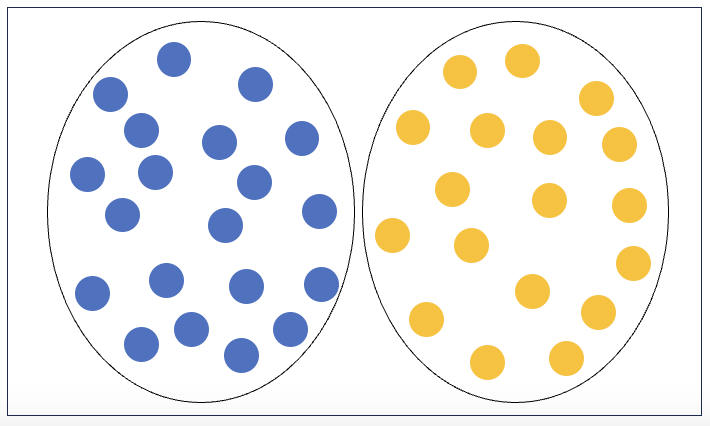

In [ ]:
show_images(images_array_new, display_time=0.75)